In [1]:
import tensorflow as tf
import keras
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt 
from tensorflow.keras.preprocessing import image_dataset_from_directory
from keras.preprocessing.image import img_to_array

data = []
labels = []

shared_dir = '/Users/prateek/Desktop/ML/Major/augmented/'
infected_dir = shared_dir + 'True_parasitized/'
uninfected_dir = shared_dir + 'True_uninfected/'
input_shape = [32, 32]
batch = 32

parasitized_data = os.listdir(infected_dir)
uninfected_data = os.listdir(uninfected_dir)


for img in parasitized_data:
    try:
        img_read = plt.imread(infected_dir + img)
        img_resize = cv2.resize(img_read, input_shape)
        img_array = img_to_array(img_resize)
        data.append(img_array)
        labels.append(1)
    except :
        None
        
for img in uninfected_data:
    try:
        img_read = plt.imread(uninfected_dir + img)
        img_resize = cv2.resize(img_read, input_shape)
        img_array = img_to_array(img_resize)
        data.append(img_array)
        labels.append(0)
    except:
        None

shared_dir = '/Users/prateek/Desktop/ML/Major/augmented/'
infected_dir = shared_dir + 'False_uninfected/'
uninfected_dir = shared_dir + 'False_parasitized/'
input_shape = [32, 32]
batch = 32


parasitized_data = os.listdir(infected_dir)
uninfected_data = os.listdir(uninfected_dir)


for img in parasitized_data:
    try:
        img_read = plt.imread(infected_dir + img)
        img_resize = cv2.resize(img_read, input_shape)
        img_array = img_to_array(img_resize)
        data.append(img_array)
        labels.append(1)
    except :
        None
        
for img in uninfected_data:
    try:
        img_read = plt.imread(uninfected_dir + img)
        img_resize = cv2.resize(img_read, input_shape)
        img_array = img_to_array(img_resize)
        data.append(img_array)
        labels.append(0)
    except:
        None

input_shape.append(3)
image_data = np.array(data)
labels = np.array(labels)

print("image_shape:", input_shape)
print("image_data:",len(image_data))
print("labels:",len(labels))

image_shape: [32, 32, 3]
image_data: 275580
labels: 275580


In [2]:
from sklearn.model_selection import train_test_split
from keras.utils import np_utils

X_train, X_test, y_train, y_test = train_test_split(image_data, labels, test_size = 0.1,random_state = 0)

y_train = np_utils.to_categorical(y_train, num_classes = 2)
y_test = np_utils.to_categorical(y_test, num_classes = 2)

print("X_train:",len(X_train))
print("X_test:",len(X_test))
print("y_train:",len(y_train))
print("y_test:",len(y_test))

X_train: 248022
X_test: 27558
y_train: 248022
y_test: 27558


In [3]:
from keras.layers import Dense,Conv2D,Flatten,MaxPooling2D,Dropout
from keras import Sequential,backend

In [4]:

dropout_rate = 0.1

if backend.image_data_format() == 'channels_first':
    input_shape = input_shape.reverse
print(input_shape)

model = Sequential()
model.add(Conv2D(4, (3, 3), activation='relu', input_shape=input_shape))
model.add(Conv2D(8, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(dropout_rate))
model.add(Flatten())
model.add(Dense(16, activation = 'relu'))
model.add(Dropout(dropout_rate, name='feature_extractor'))
model.add(Dense(2, activation='softmax'))
model.summary()


[32, 32, 3]


2022-04-19 20:10:54.142029: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-04-19 20:10:54.147184: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Metal device set to: Apple M1

systemMemory: 16.00 GB
maxCacheSize: 5.33 GB

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 4)         112       
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 8)         296       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 8)        0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 14, 14, 8)         0         
                                                                 
 flatten (Flatten)           (None, 1568)              0         
                                                                 
 dense (Dense)               (None, 16)      

In [5]:
optimizer = tf.keras.optimizers.SGD(learning_rate=0.001, momentum=0.9)
epochs = 300

accuracy_metrics = ['accuracy', 'binary_accuracy']
model.compile(optimizer=optimizer, loss="binary_crossentropy", metrics=accuracy_metrics)
history = model.fit(X_train, y_train, epochs=epochs, batch_size=32, validation_split=0.1)

2022-04-19 20:11:30.079449: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


Epoch 1/300


2022-04-19 20:11:37.609230: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


6976/6976 [==============================] - ETA: 0s - loss: 0.5822 - accuracy: 0.7005 - binary_accuracy: 0.7005

2022-04-19 20:15:54.715236: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


6976/6976 [==============================] - 271s 36ms/step - loss: 0.5822 - accuracy: 0.7005 - binary_accuracy: 0.7005 - val_loss: 0.3861 - val_accuracy: 0.8485 - val_binary_accuracy: 0.8485
Epoch 2/300
6976/6976 [==============================] - 1109s 159ms/step - loss: 0.3156 - accuracy: 0.8735 - binary_accuracy: 0.8735 - val_loss: 0.2525 - val_accuracy: 0.8984 - val_binary_accuracy: 0.8984
Epoch 3/300
6976/6976 [==============================] - 128s 18ms/step - loss: 0.2400 - accuracy: 0.9072 - binary_accuracy: 0.9072 - val_loss: 0.2163 - val_accuracy: 0.9192 - val_binary_accuracy: 0.9192
Epoch 4/300
6976/6976 [==============================] - 126s 18ms/step - loss: 0.2130 - accuracy: 0.9197 - binary_accuracy: 0.9197 - val_loss: 0.2034 - val_accuracy: 0.9273 - val_binary_accuracy: 0.9273
Epoch 5/300
6976/6976 [==============================] - 121s 17ms/step - loss: 0.1999 - accuracy: 0.9260 - binary_accuracy: 0.9260 - val_loss: 0.1948 - val_accuracy: 0.9297 - val_binary_accurac

dict_keys(['loss', 'accuracy', 'binary_accuracy', 'val_loss', 'val_accuracy', 'val_binary_accuracy'])


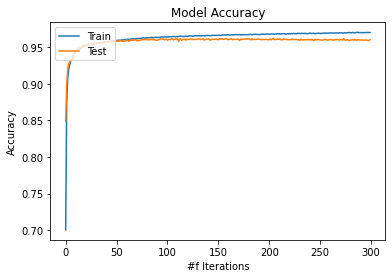

In [6]:
print(history.history.keys())
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('#f Iterations')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

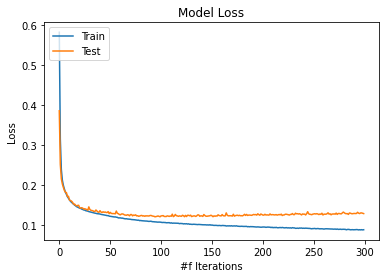

In [7]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('#f Iterations')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [8]:
import pandas as pd
from keras.models import Model

new_model=Model(inputs=model.input,outputs=model.get_layer('feature_extractor').output)
train_x=new_model.predict(X_train)
X_test=X_test.reshape(X_test.shape[0],32,32,3)
test_x=new_model.predict(X_test)
print(test_x.shape)

2022-04-20 19:36:30.769047: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


(27558, 16)


In [9]:
train_y=[ np.where(r==1)[0][0] for r in y_train ]
print(len(train_y))

248022


In [10]:

from sklearn.svm import SVC

svm=SVC()
svm.fit(train_x,train_y)
svm.score(train_x,train_y)
svm_predict=svm.predict(test_x)

In [11]:
from sklearn.metrics._plot.confusion_matrix import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score

print(confusion_matrix( y_test[:,1], svm_predict ))
print( precision_score( y_test[:,1], svm_predict, average='micro') )
print( recall_score( y_test[:,1], svm_predict, average='micro') )

[[13353   387]
 [  706 13112]]
0.9603381958052108
0.9603381958052108
